    Table Of Contents
    1.Problem Statement
    2.Data Loading and Description
    3.Loading Packages & Dataset
    4.Data Processing
        4.1  Examining the dataset
        4.2  Pre-profiling
        4.3  Pre-processing
        4.4  Post-profiling
 
    5.Exploratory Data Analysis
    
        5.1 Analysis based on Gender
          5.1.1 How is the gender participation in Summer Olympics, since 1896?
          5.1.2 Overall Gender Distribution for Summer Olympics¶
          5.1.3 How many medals were won by women in Summer Olympics?
          5.1.4 Top 10 Women Athletes - Gold Medals¶
          5.1.5 Top 10 Men Athletes - Gold Medals

        5.2 Analysis based on Year
          5.2.1 which Year had earned more medals
          5.2.2 Which athlete generate earned more medals in particular year

        5.3 Analysis based on Sport
          5.3.1 which discipline had earned more medals
          5.3.2 What is the number of Sports held per year in Summer Olypics, since 1896?
          5.3.3 Disciplines with the greatest number of Gold Medals¶
          
        5.4 Analysis based on Athlete
          5.4.1 top 10 highest medal earner
          5.4.2 How many athlete participated in each sport in Summer Olympics?
          5.4.3 How many athlete participate in each Summer Olympic?
          5.4.4 What is the YoY growth of Athlete participation in each Summer Olympic game?¶

        5.5 Analysis based on Country
          5.5.1 Top 10 countries to win most Gold medals across all seasons collectively
          5.5.2 Top 5 countries to win most Gold medals in 2012
          5.5.3 Nations with highest number of participation in olympics
          5.5.4 USA Medals in Sports across Years
          5.5.5 USA Medals in Sports across Years
          
        5.6 Analysis based on Event
          5.6.1 Number of events in each sport over years
          5.6.2 Events held in summer olympics

        5.7 How is the distribution of athlete, sport and events across each Summer Olympic?
    6.Conclusion
      6.1 Actionable Insights
    

# 1. Problem Statement - EDA over Summer Olympics Dataset



This notebooks explores the basic use of Pandas and will cover the basic commands of Exploratory Data Analysis(EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.

Exploratory Data Analysis

Understand the data by EDA and derive simple models with Pandas as baseline. EDA ia a critical and first step in analyzing the data and we do this for below reasons :
Finding patterns in Data

Determining relationships in Data

Checking of assumptions

Preliminary selection of appropriate models

Detection of mistakes

# 2. Data Loading and Description



The dataset consists of the information about Summer Olympic Games. Various variables present in the dataset includes data of atheletes, sports, events, participatin countries etc.

The dataset comprises of 31165 observations of 9 columns. Below is a table showing names of all the columns and their description.

Year-Olympic Season Year

City	-  City where games held

Sport	   Sport category

Discipline-	Name of Sport

Athlete -	Name of Athlete

Country-	Athlete's Country

Gender	-Sex of Athlete

Event	-Name of Event

Medal	-Medals

# 3. Loading Packages & Dataset

In [24]:
import pandas as pd
import numpy as np
import unicodecsv
import pandas_profiling
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
olympics=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/summer%20olympics.csv")
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


In [3]:
olympics.shape

(31165, 9)

# 4. Data Profiling

In [49]:
olympics.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [50]:
olympics.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

# pre profiling

In [59]:
olympics.profile_report(title='pandas profiling' , style={'full_width':True}).to_file(output_file="OlyPreprocessing.html")

Pre-Profiling Summary

Athlete, Country, Discipline & Event has a high cardinality

Dataset has 2 duplicate rows

Country has 4 missing values

# pre processing

In [51]:
olympics['Country'].isnull().any()

True

In [52]:
# Dropping duplicates
olympics.drop_duplicates(inplace=True)

In [54]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(olympics)

,Total,Percent
Country,4,0.012836
Medal,0,0.000000
Event,0,0.000000
Gender,0,0.000000
Athlete,0,0.000000
Discipline,0,0.000000
Sport,0,0.000000
City,0,0.000000
Year,0,0.000000


In [59]:
mode_Country=olympics['Country'].mode()
olympics['Country'].fillna(value=mode_Country,inplace=True)

In [60]:
olympics['Country'].isnull().any()

False

In [52]:
import pandas_profiling
olympics.profile_report(title='pandas profiling' , style={'full_width':True}).to_file(output_file="OlyPostProcessing.html")

In [10]:
olympics.isnull().any().any()

False

Observations

1.Athlete, Country, Discipline & Event has a high cardinality

2.Year is highly correlated with index (ρ = 0.97064)

In [62]:
olympics.dtypes
# Confirm that all variable names are now lower case

Year           int64
City          object
Sport         object
Discipline    object
Athlete       object
Country       object
Gender        object
Event         object
Medal         object
dtype: object

In [63]:
olympics.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


# 5.1 Analysis based on Gender

# 5.1.1 How is the gender participation in Summer Olympics, since 1896?


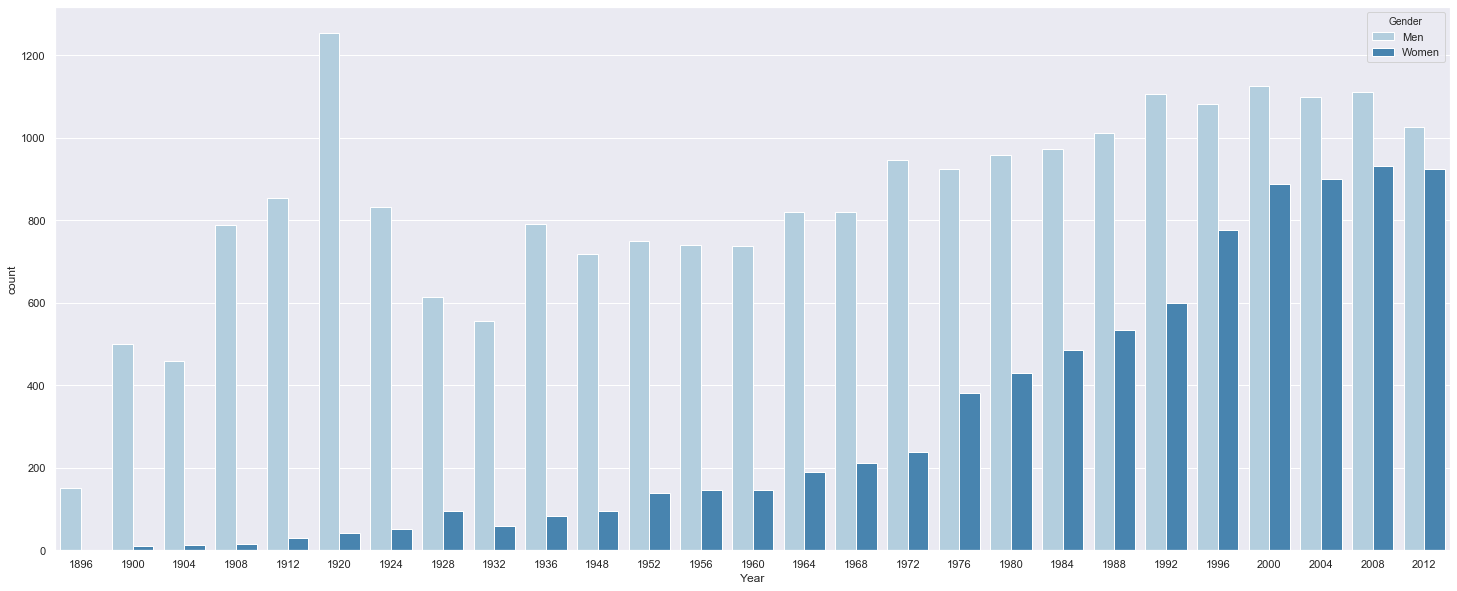

In [23]:
#Now that we have looked the events across the years, let us look at the gender participation in these events
df_sports = olympics.groupby(["Year","Gender"])["Sport"].count().reset_index().rename(columns={"Sport":"count"})
plt.figure(figsize=(25,10))
sns.barplot(x="Year", y = "count", hue = "Gender", data = df_sports, palette = "Blues" )

1.In 1986 Olympics, participants were all Men.

2.Women participation seems less and has slightly improved, post 1972.

3.Post 1972, we see Women participation grow but they still are lesser than the count of Men who participate in these games.

4.Olympics continues to be male dominated though trends show this is likely to change in near future.

# 5.1.2 Overall Gender Distribution for Summer Olympics

Text(0.5, 1.0, 'SUMMER OLYMPICS')

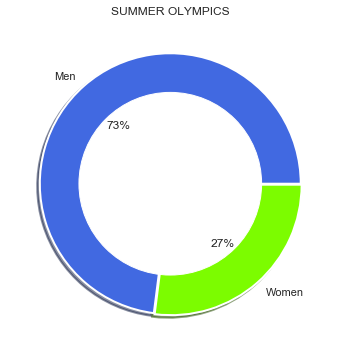

In [26]:
plt.figure(figsize=(13,6))
olympics['id'] = range(0, len(olympics))

olympics.groupby("Gender")["id"].nunique().plot.pie(autopct = "%1.0f%%",
                                               wedgeprops = {"linewidth":2,"edgecolor":"w"},
                                              explode = [0,.01],shadow = True , 
                                               colors = ["royalblue","lawngreen"]) 
plt.ylabel("")
circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(circ)
plt.title("SUMMER OLYMPICS")

# 5.1.3 How many medals were won by women in Summer Olympics?

In [30]:
womenInOlympics = olympics[(olympics['Gender'] == 'Women')&(olympics['Medal'] == 'Gold')]
womenInOlympics.groupby(['Year'])['Medal'].value_counts().sort_values(ascending=False)

Year  Medal
2008  Gold     307
2012  Gold     303
2004  Gold     298
2000  Gold     293
1996  Gold     259
1992  Gold     200
1988  Gold     172
1984  Gold     163
1980  Gold     143
1976  Gold     127
1972  Gold      80
1968  Gold      71
1964  Gold      63
1960  Gold      49
1956  Gold      46
1952  Gold      46
1948  Gold      32
1928  Gold      32
1936  Gold      28
1932  Gold      20
1924  Gold      17
1920  Gold      15
1912  Gold      10
1904  Gold       6
1908  Gold       5
1900  Gold       3
Name: Medal, dtype: int64

Text(0.5, 1.0, 'Women medals per edition of the Games')

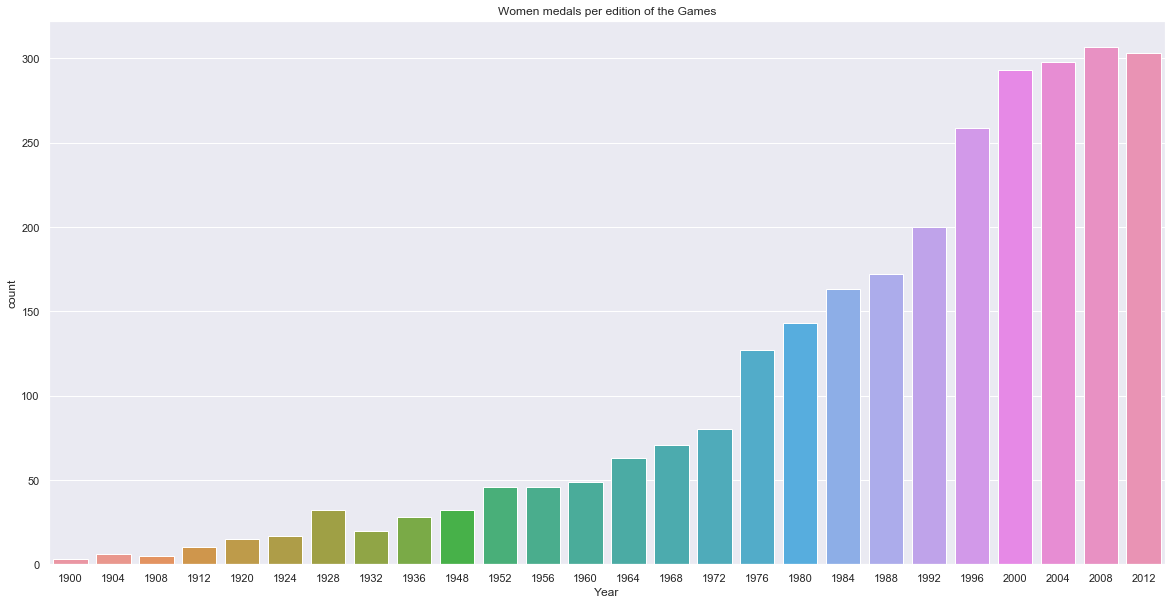

In [31]:
#Women - medals per edition of the Games
#womenInOlympics = olympic[(olympic['Gender'] == 'Women')&(olympic['Medal'] == 'Gold')]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Women medals per edition of the Games')

# 5.1.4 Top 10 Women Athletes - Gold Medals¶

In [33]:
womenMedalWinners=womenInOlympics.groupby(['Athlete'])['Medal'].value_counts().sort_values(ascending=False)
womenMedalWinners.head(10)

Athlete              Medal
LATYNINA, Larisa     Gold     9
FISCHER, Birgit      Gold     8
THOMPSON, Jenny      Gold     8
CASLAVSKA, Vera      Gold     7
VAN DYKEN, Amy       Gold     6
OTTO, Kristin        Gold     6
VEZZALI, Valentina   Gold     6
WERTH, Isabell       Gold     5
KIM, Nelli           Gold     5
DAVYDOVA, Anastasia  Gold     5
Name: Medal, dtype: int64

Text(0.5, 1, 'Medals per Women Athlete')

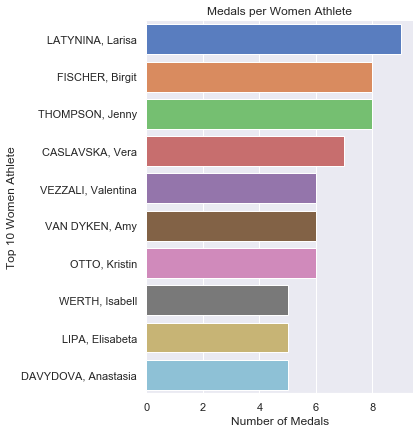

In [37]:
totalWomenGoldMedalAthlete = olympics[(olympics['Medal'] == 'Gold') & (olympics['Gender'] == 'Women')]['Athlete'].value_counts().reset_index(name='Athlete').head(10)
g = sns.catplot(y="index", x="Athlete", data=totalWomenGoldMedalAthlete,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Number of Medals")
g.set_ylabels("Top 10 Women Athlete")
plt.title('Medals per Women Athlete')

# 5.1.5 Top 10 Men Athletes - Gold Medals

In [41]:
menInOlympics = olympics[(olympics['Gender'] == 'Men')&(olympics['Medal'] == 'Gold')]
menInOlympics.groupby(['Athlete'])['Medal'].value_counts().sort_values(ascending=False).head(10)

Athlete                     Medal
PHELPS, Michael             Gold     18
LEWIS, Carl                 Gold      9
NURMI, Paavo                Gold      9
SPITZ, Mark                 Gold      9
EWRY, Ray                   Gold      8
BIONDI, Matthew             Gold      8
KATO, Sawao                 Gold      8
CHUKARIN, Viktor Ivanovich  Gold      7
SHAKHLIN, Boris             Gold      7
GEREVICH, Aladar            Gold      7
Name: Medal, dtype: int64

Text(0.5, 1, 'Medals per Men Athlete')

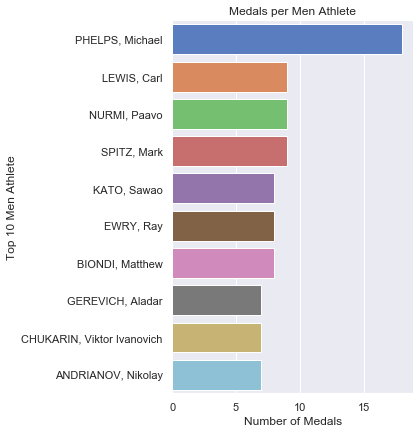

In [43]:
totalMenGoldMedalAthlete = olympics[(olympics['Medal'] == 'Gold') & (olympics['Gender'] == 'Men')]['Athlete'].value_counts().reset_index(name='Athlete').head(10)
g = sns.catplot(y="index", x="Athlete", data=totalMenGoldMedalAthlete,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Number of Medals")
g.set_ylabels("Top 10 Men Athlete")
plt.title('Medals per Men Athlete')

# 5.2  Analysis based on Year

#   5.2.1 which Year had earned more medals 

In [67]:
olympics.Year.value_counts().head(10)

2008    2042
2000    2015
2004    1998
2012    1948
1996    1859
1992    1705
1988    1546
1984    1459
1980    1386
1976    1305
Name: Year, dtype: int64

In [91]:
olympics.City.value_counts().head(10)

London         3566
Athens         2149
Los Angeles    2074
Beijing        2042
Sydney         2015
Atlanta        1859
Barcelona      1705
Seoul          1546
Paris          1396
Moscow         1386
Name: City, dtype: int64

Text(0.5, 1.0, 'Count plot for medals in summer olympics')

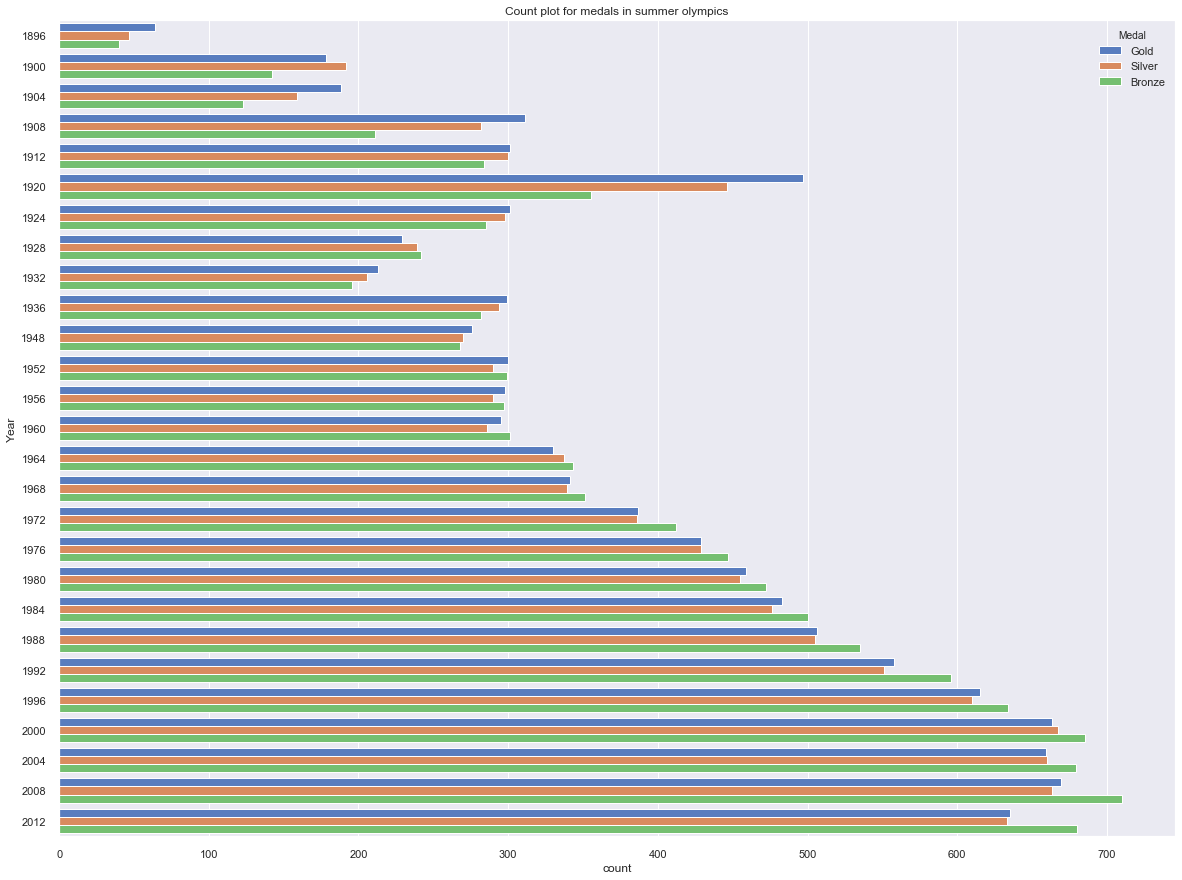

In [93]:
# Discipline with maximum medals
olympics.groupby(['Year'])['Medal'].value_counts().sort_values(ascending=False)
plt.subplots(figsize=(20,15))

sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.countplot(y='Year', hue='Medal', data=olympics).set_title('Count plot for medals in summer olympics')

# 5.2.2 Which athlete generate earned more medals in particular year

In [4]:
# oldest olympic sport
olympics.groupby(['Athlete','Year'])['Medal'].value_counts().sort_values(ascending=False)


Athlete                                Year  Medal 
PHELPS, Michael                        2008  Gold      8
SPITZ, Mark                            1972  Gold      7
PHELPS, Michael                        2004  Gold      6
SCHERBO, Vitaly                        1992  Gold      6
OTTO, Kristin                          1988  Gold      6
NURMI, Paavo                           1924  Gold      5
HEIDA, Anton                           1904  Gold      5
LEE, Willis                            1920  Gold      5
GOROKHOVSKAYA, Mariya                  1952  Silver    5
BIONDI, Matthew                        1988  Gold      5
NADI, Nedo                             1920  Gold      5
ARTEMOV, Vladimir                      1988  Gold      4
FRANKLIN, Missy                        2012  Gold      4
VAN DYKEN, Amy                         1996  Gold      4
BLANKERS-KOEN, Fanny                   1948  Gold      4
RITOLA, Ville                          1924  Gold      4
LATYNINA, Larisa                    

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(20,15))

sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.countplot(y='Athlete', hue='Medal', data=olympics).set_title('Count plot for medals in summer olympics')

Text(0.5, 1.0, 'Count plot for medals in summer olympics')

# 5.3 Analysis based on Sport

         

# 5.3.1 which discipline had earned more medals

In [20]:
a1=olympics.groupby(['Discipline'])['Medal'].value_counts().head(10).sort_values(ascending=False)
a1

Discipline   Medal 
Athletics    Silver    1224
             Gold      1215
             Bronze    1199
Artistic G.  Gold       752
             Silver     688
             Bronze     663
Archery      Gold       126
             Silver     113
             Bronze      90
BMX          Bronze       2
Name: Medal, dtype: int64

Text(0.5, 1.0, 'Count plot for medals in summer olympics')

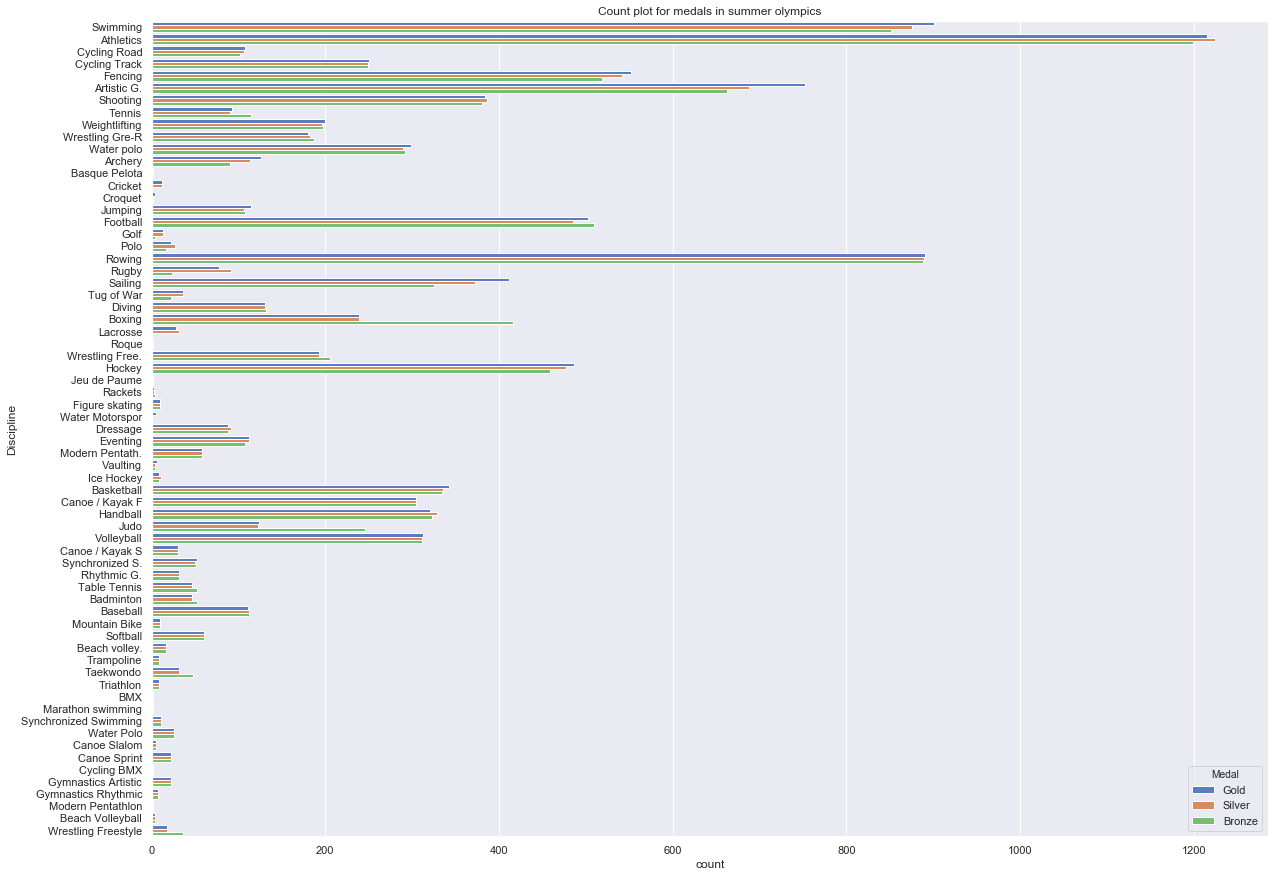

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(20,15))

sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.countplot(y='Discipline', hue='Medal', data=olympics).set_title('Count plot for medals in summer olympics')

# 5.3.2 What is the number of Sports held per year in Summer Olypics, since 1896?

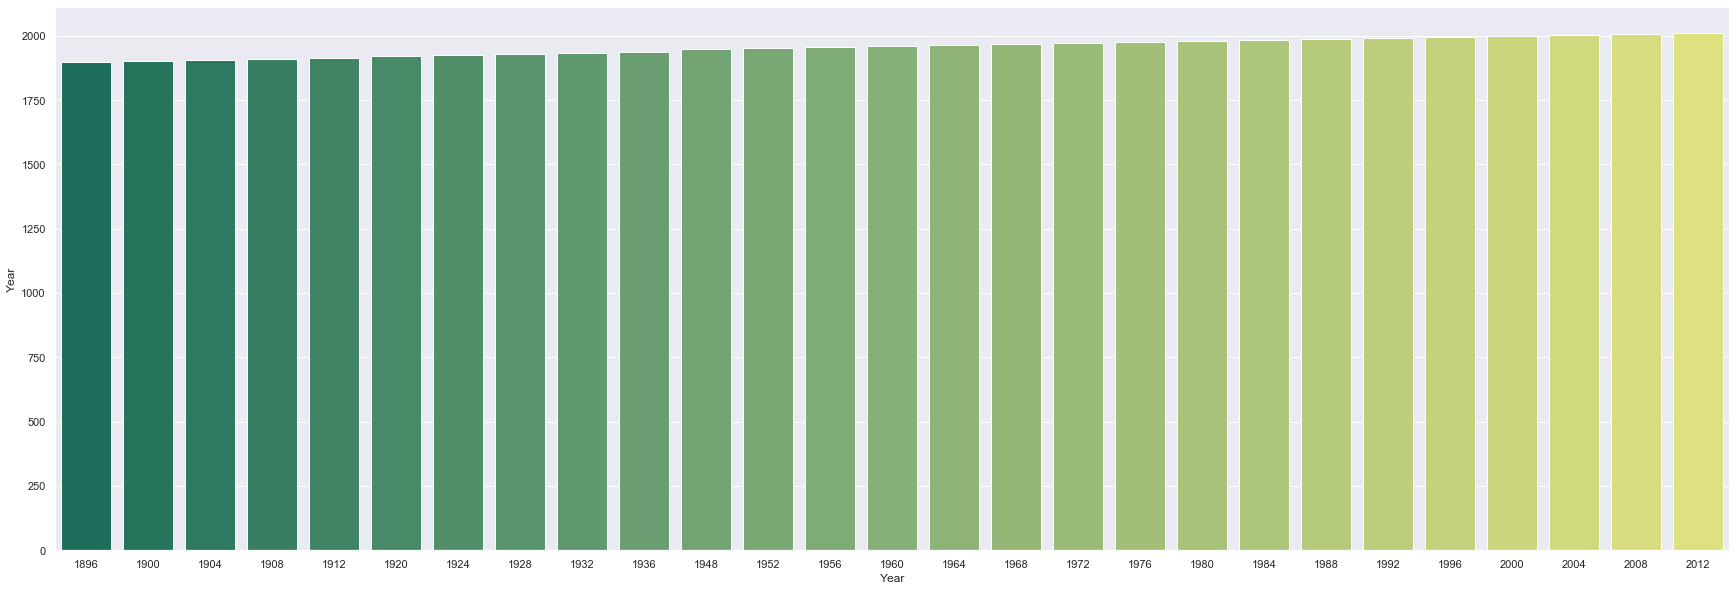

In [22]:
#Let us summarize number of "Sports" held per year, starting 1896
df_sports = olympics.groupby("Year")["Sport"].nunique().sort_values(ascending=False).reset_index()
fig = plt.figure(figsize=(30,10))
fig.add_subplot(111)
sns.barplot(x = "Year", y = "Year", data=df_sports, palette="summer", saturation=.65 )

1.2002, 2004 & 2008 seems to be the year where most Sports events were held

2.1896 seems to be the year with lowest number of Sports events, this is the year Olympics started.

3.From 1984 we see a raise, and it is almost consistent from 1996.

## 5.3.3 Disciplines with the greatest number of Gold Medals

In [77]:
# create a dataframe to filter the gold medals only for the USA.
goldMedalsUSA = olympics[(olympics['Medal']=='Gold')].loc[olympics[(olympics['Medal']=='Gold')]['Country'] == 'USA']

In [78]:
goldMedalsUSA.Event.value_counts().reset_index(name='medal').head(20)

,index,medal
0,Basketball,258
1,Eight With Coxswain (8+),126
2,4X100M Medley Relay,111
3,4X100M Relay,107
4,4X100M Freestyle Relay,103
5,4X400M Relay,101
6,Football,91
7,4X200M Freestyle Relay,88
8,Team,46
9,Rugby,46


Basketball is the leading discipline!

# 5.4 Analysis based on Athlete

#  5.4.1  top 10 highest  medal earner

In [47]:
df_athlete = olympics.groupby(["Athlete","Discipline"])["Medal"].nunique().sort_values(ascending=False).reset_index()
df_athlete

,Athlete,Discipline,Medal
0,"FREDRIKSSON, Gert",Canoe / Kayak F,3
1,"COP, Iztok",Rowing,3
2,"NOVIKOVA-BELOVA, Elena",Fencing,3
3,"NOVAK-GERARD, Eva",Swimming,3
4,"WELLER, Ronny",Weightlifting,3
5,"RHODE, Kimberly",Shooting,3
6,"GRAEL, Torben",Sailing,3
7,"JANZ, Karin",Artistic G.,3
8,"GRAF, Steffi",Tennis,3
9,"SINGH, Prithipal",Hockey,3


## 5.4.2 How many athlete participated in each sport in Summer Olympics? 

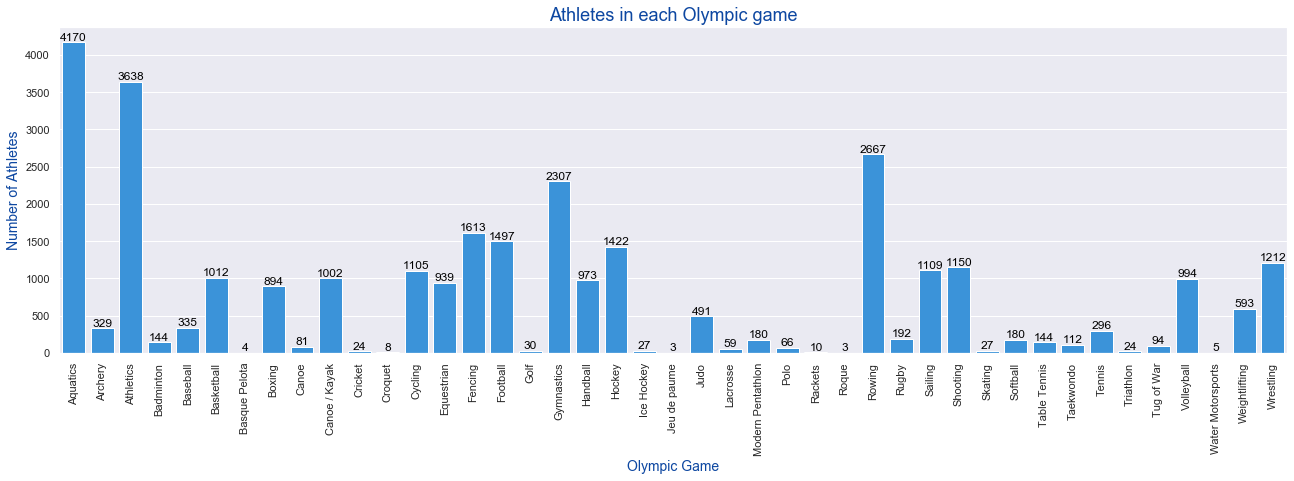

In [49]:
# Athletes in each olympic games
games_athletes = olympics.pivot_table(olympics, index=['Sport'], aggfunc=lambda x: len(x.unique())).reset_index()[['Sport','id']]
fig, ax = plt.subplots(figsize=(22,6))
a = sns.barplot(x='Sport', y='id', data=games_athletes, ax=ax, color="#2196F3")
a.set_xticklabels(labels=games_athletes['Sport'],rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Olympic Game', size=14, color="#0D47A1")
ax.set_ylabel('Number of Athletes', size=14, color="#0D47A1")
ax.set_title('Athletes in each Olympic game', size=18, color="#0D47A1")

plt.show()

# 5.4.3 How many athlete participate in each Summer Olympic?

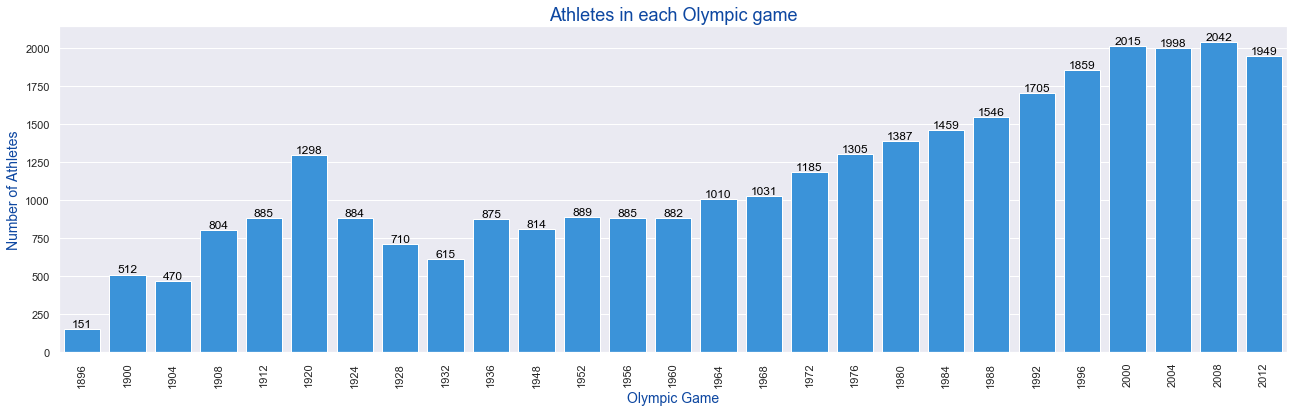

In [50]:
# Total Athletes in each olympic games
games_athletes = olympics.pivot_table(olympics, index=['Year'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','id']]
fig, ax = plt.subplots(figsize=(22,6))
a = sns.barplot(x='Year', y='id', data=games_athletes, ax=ax, color="#2196F3")
a.set_xticklabels(labels=games_athletes['Year'],rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Olympic Game', size=14, color="#0D47A1")
ax.set_ylabel('Number of Athletes', size=14, color="#0D47A1")
ax.set_title('Athletes in each Olympic game', size=18, color="#0D47A1")

plt.show()


# 5.4.4 What is the YoY growth of Athlete participation in each Summer Olympic game?

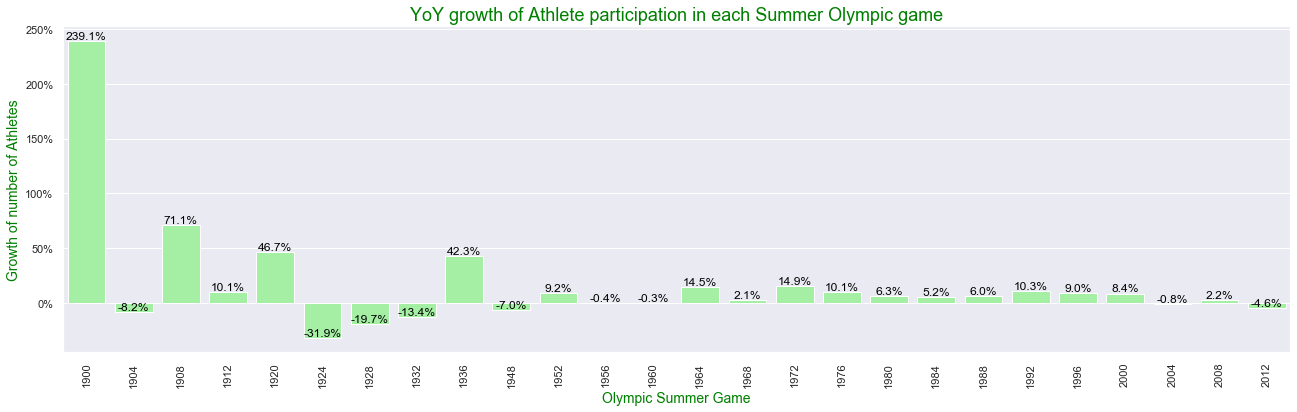

In [54]:
summer_games_athletes = olympics.pivot_table(olympics, index=['Year'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','id']]
summer_games_athletes['id1'] = summer_games_athletes['id'].shift(1)
summer_games_athletes['growth'] = ((summer_games_athletes['id']-summer_games_athletes['id1']))/summer_games_athletes['id1']
summer_games_athletes.dropna(inplace=True)

fig, ax = plt.subplots(figsize=(22,6))
a = sns.barplot(x='Year', y='growth', data=summer_games_athletes, ax=ax, color="palegreen")
a.set_xticklabels(labels=summer_games_athletes['Year'],rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '{:,.1%}'.format(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Olympic Summer Game', size=14, color="green")
ax.set_ylabel('Growth of number of Athletes', size=14, color="green")
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
ax.set_title('YoY growth of Athlete participation in each Summer Olympic game', size=18, color="green")

plt.show()

1.Growth in the number of athletes in Summer Olympics have become stagnant in the last 4 games.

2.In the last 4 summer games, the growth/degrowth of number of athletes in Summer Olympics ranges between -5% to 8%.

# 5.5 Analysis based on Country

## 5.5.1  Top 10 countries to win most Gold medals across all seasons collectively

In [58]:
olympics[(olympics['Medal'] == 'Gold')]['Country'].value_counts().reset_index(name='medal').head(10)

,index,medal
0,USA,2235
1,URS,838
2,GBR,546
3,ITA,476
4,GER,452
5,HUN,412
6,FRA,408
7,SWE,349
8,GDR,329
9,AUS,312


Text(0.5, 1, 'Medals per Country')

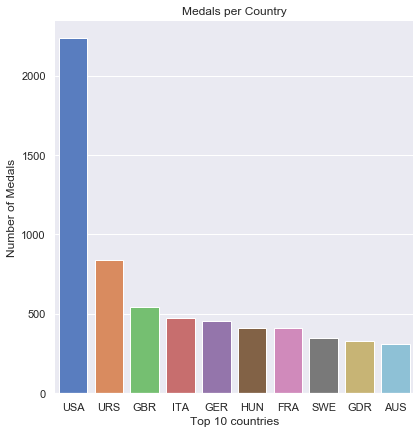

In [75]:
totalGoldMedals = olympics[(olympics['Medal'] == 'Gold')]['Country'].value_counts().reset_index(name='Medal').head(10)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 10 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

The USA seems to win most Gold medals

# 5.5.2 Top 5 countries to win most Gold medals in 2012

Text(0.5, 1, 'Medals per Country in 2012')

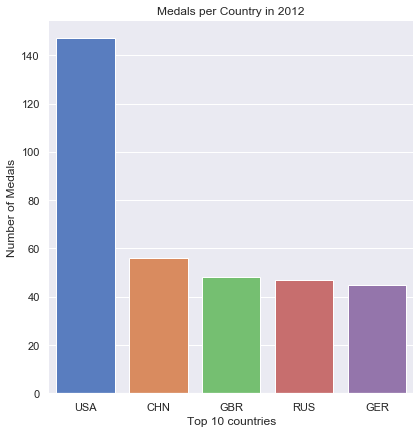

In [76]:
totalGoldMedals = olympics[(olympics['Medal'] == 'Gold') & (olympics['Year'] == 2012)]['Country'].value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 10 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country in 2012')

## 5.5.3 Nations with highest number of participation in olympics

Text(0.5, 1.0, 'countries - summer olympics')

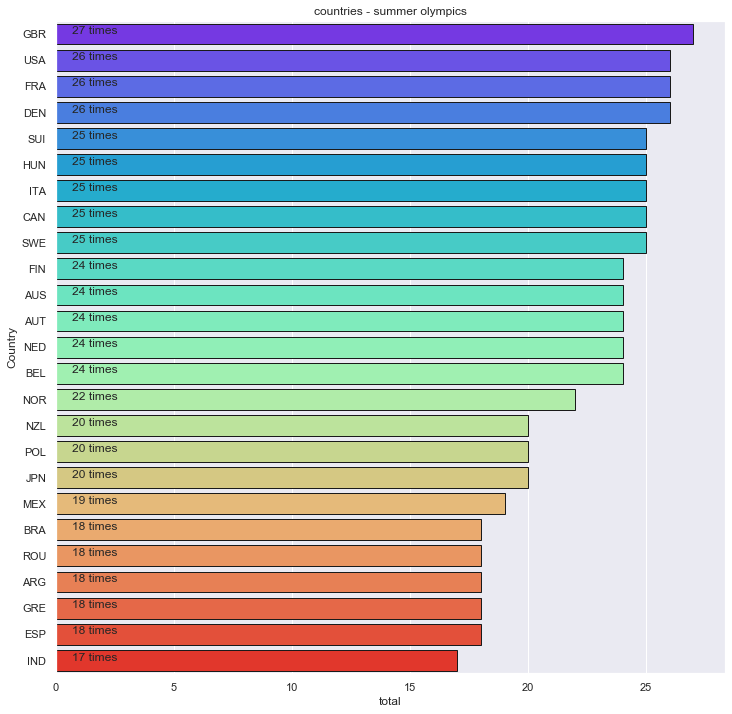

In [82]:
import numpy as np
yr_cn = pd.crosstab(olympics["Country"],olympics["Year"]).reset_index()
cols = yr_cn.columns[1:]

for i in cols:
    yr_cn[i] = np.where(yr_cn[i] > 0 ,1,0)
    
yr_cn["total"] = yr_cn[cols].sum(axis = 1)
yr_cn = yr_cn.sort_values(by = "total",ascending=False)


plt.figure(figsize=(12,12))
ax = sns.barplot("total","Country",data=yr_cn[:25],
                 linewidth = 1,edgecolor = "k"*25,
                 palette = "rainbow"
                )

for i,j in enumerate(yr_cn["total"][:25].astype(str) + " times"):
    ax.text(.7,i,j,fontsize = 12)
    
plt.title("countries - summer olympics")

## 5.5.4 USA Medals in Sports across Years

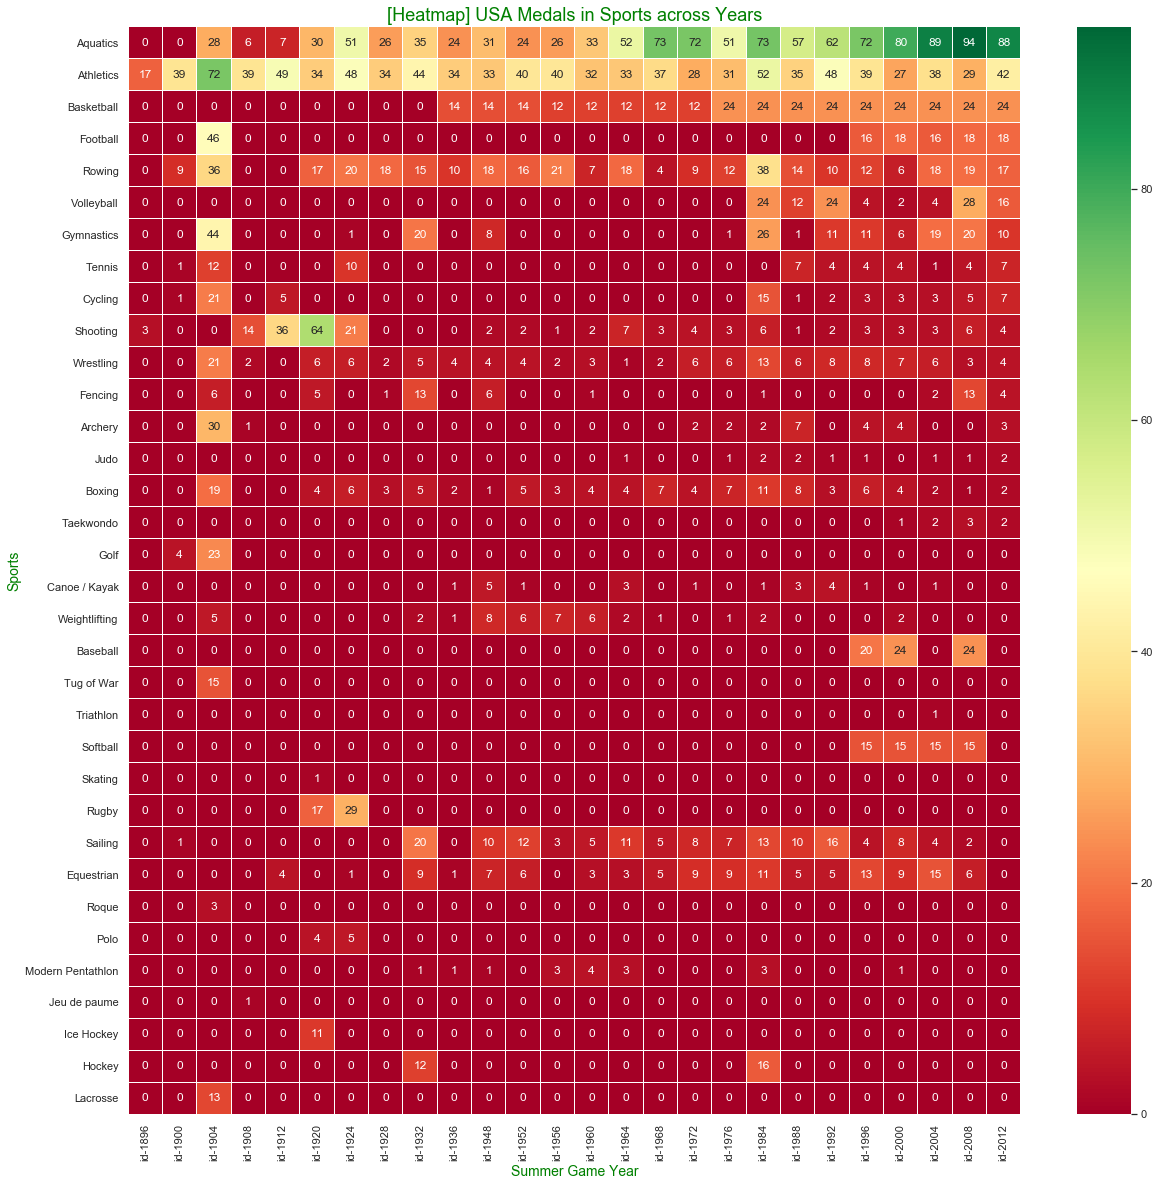

In [85]:
t3_summer = olympics[(olympics['Country'].isin(['USA'])) & (olympics['Medal']!='No Medal')]
t3_summer = pd.pivot_table(t3_summer, index=['Sport'], columns=['Year'], values=['id'],  aggfunc=len, fill_value=0)
t3_summer = t3_summer.reindex(t3_summer['id'].sort_values(by=2012, ascending=False).index)

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(t3_summer, annot=True, linewidths=0.05, ax=ax, cmap="RdYlGn")
ax.set_xlabel('Summer Game Year', size=14, color="green")
ax.set_ylabel('Sports', size=14, color="green")
ax.set_title('[Heatmap] USA Medals in Sports across Years', size=18, color="green")
plt.show()

USA has bagged a lot of medals in Aquatics and Athletics.

## 5.5.5 IND Medals in Sports across Years

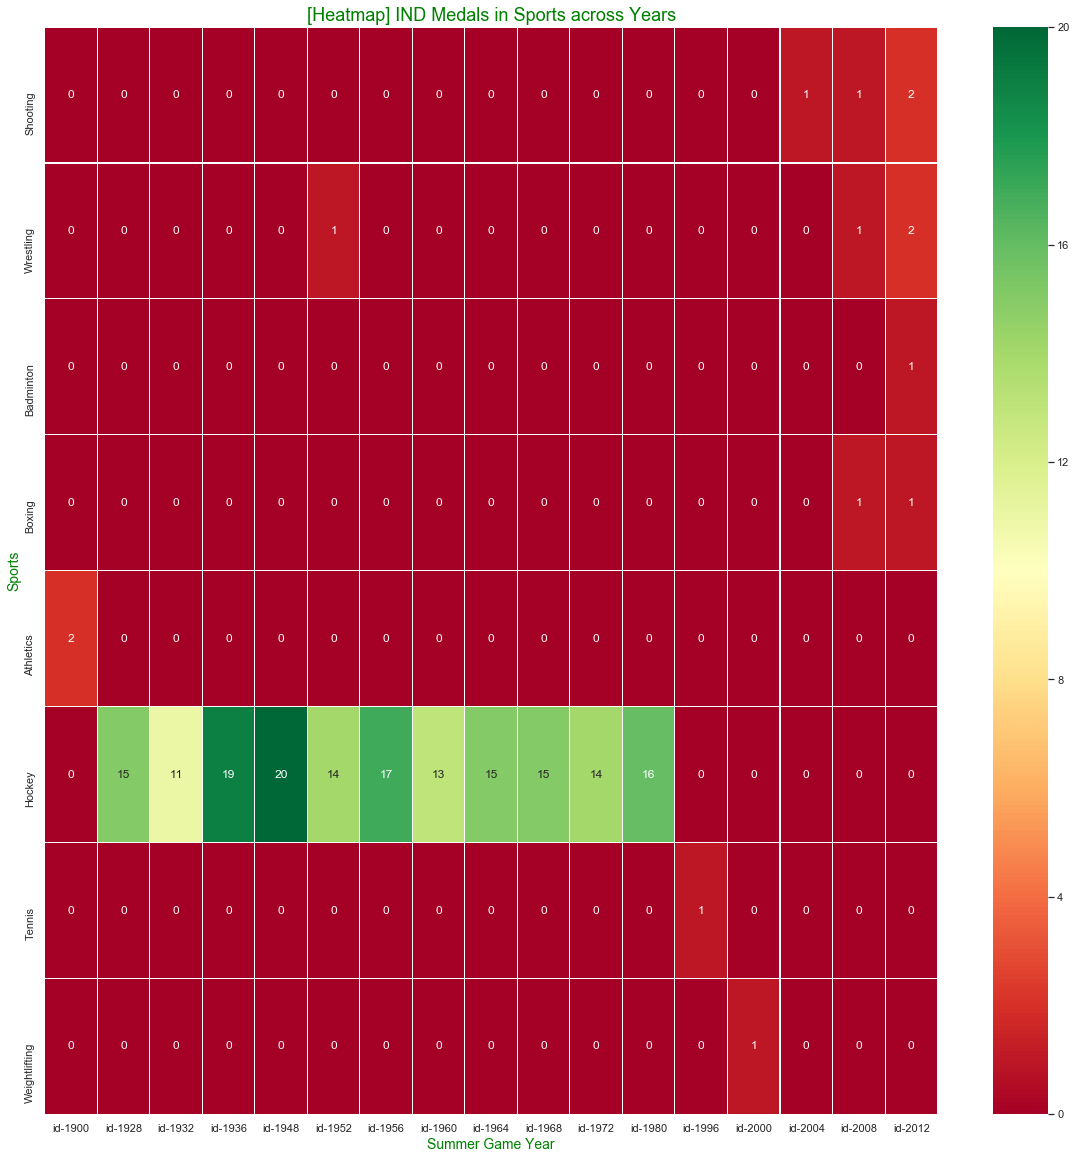

In [86]:
t3_summer = olympics[(olympics['Country'].isin(['IND'])) & (olympics['Medal']!='No Medal')]
t3_summer = pd.pivot_table(t3_summer, index=['Sport'], columns=['Year'], values=['id'],  aggfunc=len, fill_value=0)
t3_summer = t3_summer.reindex(t3_summer['id'].sort_values(by=2012, ascending=False).index)

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(t3_summer, annot=True, linewidths=0.05, ax=ax, cmap="RdYlGn")
ax.set_xlabel('Summer Game Year', size=14, color="green")
ax.set_ylabel('Sports', size=14, color="green")
ax.set_title('[Heatmap] IND Medals in Sports across Years', size=18, color="green")
plt.show()

IND has bagged a lot of medals in Hockey

#   5.6 Analysis based on Event

## 5.6.1 Number of events in each sport over years [Heatmap]

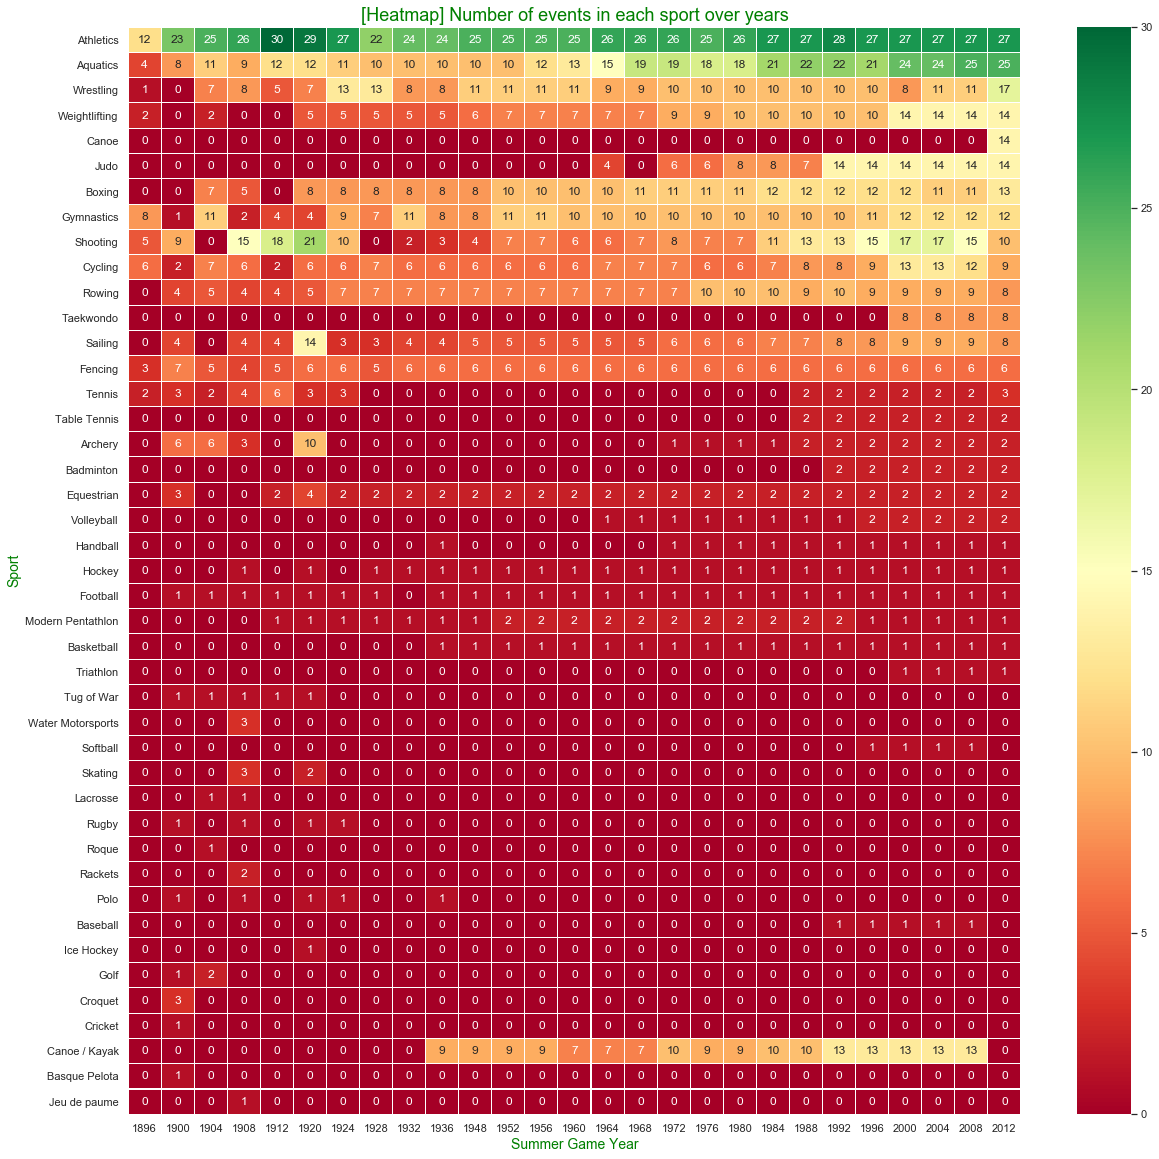

In [79]:
sport_year = olympics.pivot_table(olympics, index=['Year','Sport'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','Sport','Event']]
sport_year = sport_year.pivot("Sport", "Year", "Event")
sport_year.fillna(0,inplace=True)
sport_year = sport_year.reindex(sport_year.sort_values(by=2012, ascending=False).index)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(sport_year, annot=True, linewidths=0.05, ax=ax, cmap="RdYlGn")
ax.set_xlabel('Summer Game Year', size=14, color="green")
ax.set_ylabel('Sport', size=14, color="green")
ax.set_title('[Heatmap] Number of events in each sport over years', size=18, color="green")
plt.show()


Athletics and Aquatics are the sports which has the maximum number of events

## 5.6.2 Events held in summer olympics

Text(0.5, 1.0, 'Unique sport Events over years for Summer Olympics')

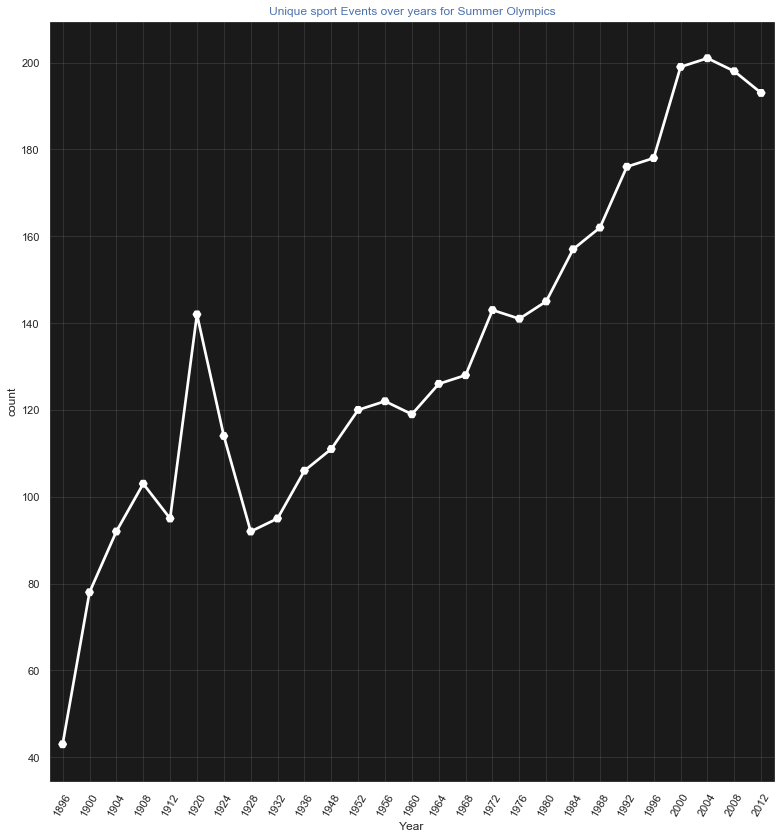

In [80]:
ev_s = olympics.groupby("Year")["Event"].nunique().reset_index()
plt.figure(figsize=(13,14))

ax = sns.pointplot(ev_s["Year"],ev_s["Event"],color="w",markers="H")
plt.xticks(rotation = 60)
ax.set_facecolor("k")
plt.grid(True,alpha=.1)
plt.ylabel("count")
plt.title("Unique sport Events over years for Summer Olympics",color="b")

# 5.7 How is the distribution of athlete, sport and events across each Summer Olympic?

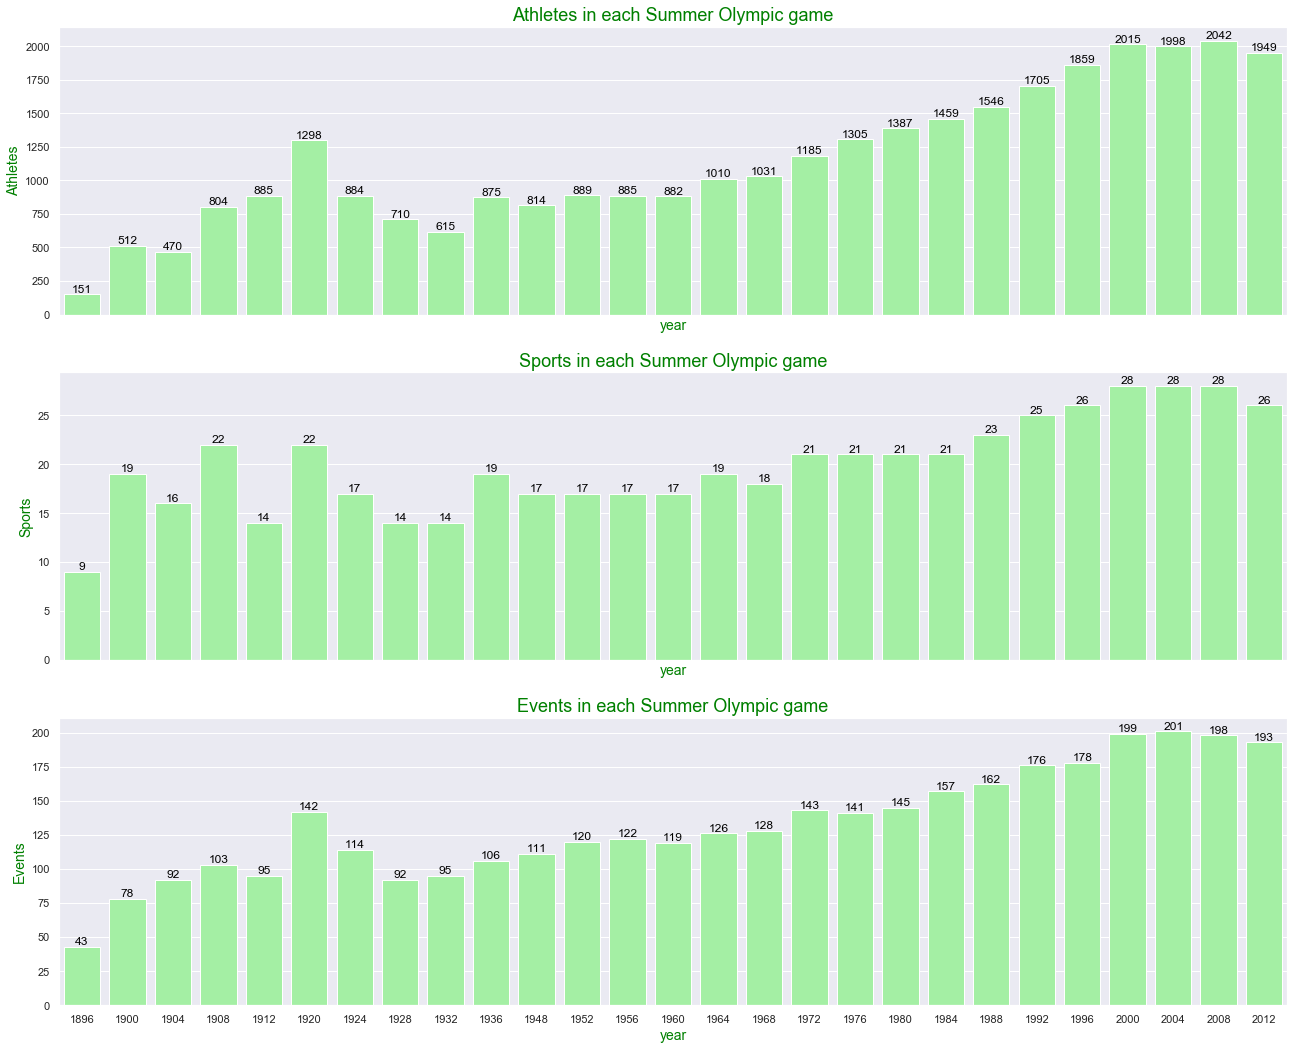

In [84]:
#summer = olympic[olympic['Season']=='Summer']

summer_athletes = olympics.pivot_table(olympics, index=['Year'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','id']]
summer_sports = olympics.groupby('Year')['Sport'].nunique().reset_index()
summer_events = olympics.groupby('Year')['Event'].nunique().reset_index()

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(22,18))

sns.barplot(x='Year', y='id', data=summer_athletes, ax=ax[0], color="palegreen")
sns.barplot(x='Year', y='Sport', data=summer_sports, ax=ax[1], color="palegreen")
sns.barplot(x='Year', y='Event', data=summer_events, ax=ax[2], color="palegreen")

j = 0
for i in ['Athletes', 'Sports', 'Events']:
    ax[j].set_xlabel('year', size=14, color="green")
    ax[j].set_ylabel(i, size=14, color="green")
    ax[j].set_title(i + ' in each Summer Olympic game', size=18, color="green")
    j = j + 1
    
for i in range(3):
    for p in ax[i].patches:
        ax[i].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
                fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# 6.Conclusion


43 uniques events we had thus far, in Summer Olympics

1 2002, 2004 & 2008 seems to be the year where most Sports events were held

2 1896 seems to be the year with lowest number of Sports events, this is the year Olympics started.

3 From 1984 we see a raise, and it is almost consistent from 1996.

4 In 1986 Olympics, participants were all Men.

5 Women participation seems less and has slightly improved, post 1972.

6 Post 1972, we see Women participation grow but they still are lesser than the count of Men who participate in these games.

7 Olympics continues to be male dominated though trends show this is likely to change in near future.

8 For Men Athletes:
The growth for men seems less strong:

After the 2000 we can see a relevant decrease in the number of male athletes at the summer games;
The growth has decreased recently.

Gender Distribution for Summer Olympics

Male - 73%

Female - 27%

9 21 cities hosted the Summer Olympics games, since 1896.

10 Cities which conducted Olympics was more than once
London 3
Los Angeles 2
Athens 2
Paris 2 There are 21 cities in which Summer Olympics was conducted since 1896

11 Overall, with repect to Gold medals, United States seems to top the list, with more than twice the medal haul of the second place holder USR(Soviet).
7.2 Germanay and Great Britain comes third
7.3 Sweden and EUN has the least.
Women Medals counts incresed since 1972and is more or less saturated since last 3-4 Seasons9.
Top 5 Countries to win most Gold medals so far Country Medal 1 USA 2235 2 URS 838 3 GBR 546 4 ITA 476 5 GER 452
Basketball is the leading discipline
Athletics and Aquatics are the sports which has the maximum number of events
Growth is saturated and started moving in negative direction in number of athletes
28 sports competitions is the maximum in a summer olympic game.
Events have come to a saturation point in the last 4 summer games.
In the last 4 summer games, the growth/degrowth of number of athletes in Summer Olympics ranges between -5% to 8%
USA, Russia and Great Britain are the top 3 countries in Summer Olympics medal tally.
USA has bagged a lot of medals in Aquatics and Athletics.
Russia has bagged a lot of medals in Aquatics, Gymnastics and Athletics
Britain has bagged many medals in Rowing, Cycling and Aquatics
GBR, USA, FRA, DEN have highest participation in summer olympics